# Análise e Transformação de Dados @ DEI-FCTUC
## Uma resolução dos exercícios da Ficha Prática nº 2 usando Python
### Autoria: Alberto Cardoso ©DEI2021/2022

Objetivo: Pretende-se adquirir competências para a análise de sinais de tempo contínuo e de tempo discreto, nomeadamente para análise das suas propriedades e para o cálculo da sua energia.

### Exercícios:

<strong>Exercício 1.</strong> Pretende-se analisar o sinal de tempo contínuo $x_1(t)=A_1 sin(\omega_at)cos(\omega_bt)+A_2cos(\omega_ct)^2$ ao longo do seu período fundamental, em que:

$A_1=2(mod(PL\#,2)+1)$, $A_2=6(mod(PL\#,2)+1)$,   com $PL\#$ = nº da turma PL

$\omega_a=mod(PL\#,5)+2$,  $\omega_b=mod(PL\,7)+7$,   $\omega_c=mod(PL\#,9)+1$

**Exercício 1.1** Determinar as frequências (linear e angular) fundamentais e o período fundamental de $x_1(t)$, tendo em conta a seguinte formulação de Fourier para sinais de tempo contínuo:
$x_1(t)=\sum_{m=0}^{\infty}C_mcos(m\omega_0t+\theta_m)$ .

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

PL=1 # Número da turma PL
A1=2*(np.mod(PL,2)+1)
A2=6*(np.mod(PL,2)+1)
wa=np.mod(PL,5)+2
wb=np.mod(PL,7)+7
wc=np.mod(PL,9)+1

# sinal x1(t)
t=sp.symbols('t')
x1ts=A1*sp.sin(wa*t)*sp.cos(wb*t)+A2*sp.cos(wc*t)**2
print('x1(t) = ',x1ts)

# PL1: x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
# Considerando as relações trigonométricas, verifica-se que 
# as frequências presentes no sinal são:
# w pertencente a {3+8, 3-8, 2+2, 2-2} ou seja {0, 4, 5, 11} rad/s
w=[0, 4, 5, 11]

# frequência angular fundamental, w0, em rad/s
w0 = np.gcd.reduce(w)
print('w0 = ',w0,'rad/s')
# frequência linear fundamental, f0, em Hz
f0 = w0/(2*sp.pi)
print('f0 = ',f0,'Hz')
# período fundamental, T0, em s
T0 = 1/f0
print('T0 = ',T0,'s')

# expressão equivalente de x1(t) (turma PL1) conforme formulação de Fourier
x1teqs=6*sp.cos(0)+6*sp.cos(4*t+0)+2*sp.cos(5*t+sp.pi/2)+2*sp.cos(11*t-sp.pi/2)
print('x1eq(t) = ',x1teqs)

x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
w0 =  1 rad/s
f0 =  1/(2*pi) Hz
T0 =  2*pi s
x1eq(t) =  -2*sin(5*t) + 2*sin(11*t) + 6*cos(4*t) + 6


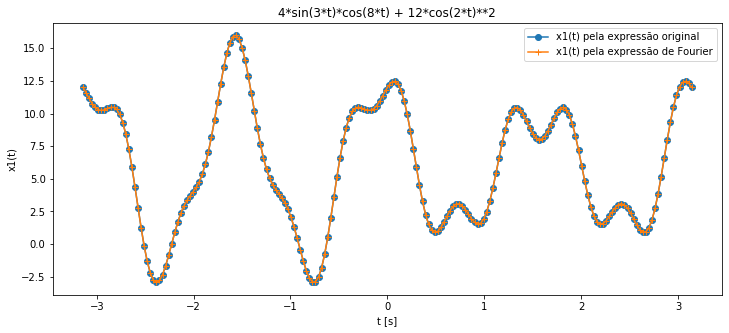

In [2]:
# obtenção e plot de x1 e x1eq
tt=np.linspace(-np.pi,np.pi,200);
f_x1t=sp.lambdify(t,x1ts,"numpy")
x1t=f_x1t(tt)
f_x1teq=sp.lambdify(t,x1teqs,"numpy")
x1teq=f_x1teq(tt)

plt.figure(figsize=(12,5))
plt.plot(tt,x1t,'-o',label='x1(t) pela expressão original')
plt.plot(tt,x1teq,'-+',label='x1(t) pela expressão de Fourier')
plt.xlabel('t [s]')
plt.ylabel('x1(t)')
plt.title(str(x1ts))
plt.legend(loc='upper right')
plt.show()

**Exercício 1.2** Verificar a paridade do sinal $x_1(t)$.

In [3]:
print('x1(t) = ',x1ts)
x1_ts=x1ts.subs(t,-t)
print('x1(-t) = ',x1_ts)
if x1ts==x1_ts:
    print('x1(t) é um sinal par')
elif x1ts == -x1_ts:
    print('x1(t) é um sinal ímpar')
else:
    print('x1(t) é um sinal nem par nem ímpar')

x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
x1(-t) =  -4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
x1(t) é um sinal nem par nem ímpar


**Exercício 1.3** Obter a expressão do sinal de tempo discreto $x_1[n]$ que resulta de $x_1(t)$ usando $t=nT_s$, em que $T_s$ representa o período de amostragem com que o sinal de tempo contínuo $x_1(t)$ é amostrado.

In [4]:
t,n,Ts=sp.symbols('t n Ts')
print('x1(t) = ',x1ts)
x1ns=x1ts.subs(t,n*Ts)
print('x1[n] = ',x1ns)

x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
x1[n] =  4*sin(3*Ts*n)*cos(8*Ts*n) + 12*cos(2*Ts*n)**2


**Exercício 1.4** Determinar a frequência angular fundamental e o período fundamental de $x_1[n]$, tendo em conta a seguinte formulação de Fourier para sinais de tempo contínuo:
$x_1[n]=\sum_{m=0}^{\infty}C_mcos[m\Omega_0n+\theta_m]$ .

In [5]:
# Tendo em conta as frequências angulares presentes no sinal x1(t)
# obtém-se a frequência angular fundamental de x1[n], Omega0, em rad
Omega0s = np.gcd.reduce(w)*Ts
print('Omega0 = ',Omega0s,'rad')

# período fundamental de x1[n], N
Ns = 2*sp.pi/Omega0s
print('N = ',Ns)

# expressão equivalente de x1(t) conforme formulação de Fourier
x1neqs=x1teqs.subs(t,n*Ts)
print('x1[n] = ',x1neqs)

Omega0 =  Ts rad
N =  2*pi/Ts
x1[n] =  -2*sin(5*Ts*n) + 2*sin(11*Ts*n) + 6*cos(4*Ts*n) + 6


**Exercício 1.5** Representar no mesmo gráfico o sinal $x_1(t)$ para $t \in [-\pi,\pi]$, considerando $t$ com 1000 elementos e um traçado com linha contínua, e o sinal $x_1[n]$, considerando um período de amostragem (passo) $T_s = 0.1s$, num intervalo para $n$ correspondente a $x_1(t)$ para $t \in [-\pi,\pi]$ e a representação apenas das amostras.

Omega0 =  0.100000000000000 rad
N =  62


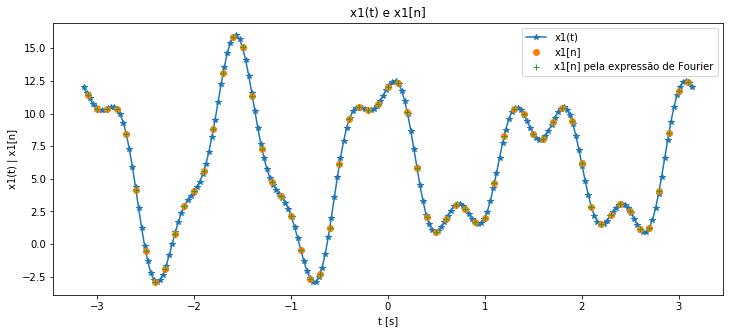

In [6]:
# obtenção e plot de x1(t) , x1[n] e x1eq[n]
Tsample=0.1
Omega0=Omega0s.subs(Ts,Tsample)
print('Omega0 = ',Omega0,'rad')
N=int(Ns.subs(Ts,Tsample))
print('N = ',N)

nn=np.arange(np.fix(-N/2),np.fix(N/2)+1)
f=sp.lambdify((n,Ts),x1ns,"numpy")
x1n=f(nn,Tsample)
f=sp.lambdify((n,Ts),x1neqs,"numpy")
x1neq=f(nn,Tsample)

plt.figure(figsize=(12,5))
plt.plot(tt,x1t,'-*',label='x1(t)')
plt.plot(nn*Tsample,x1n,'o',label='x1[n]')
plt.plot(nn*Tsample,x1neq,'+',label='x1[n] pela expressão de Fourier')
plt.xlabel('t [s]')
plt.ylabel('x1(t) | x1[n]')
plt.title('x1(t) e x1[n]')
plt.legend(loc='upper right')
plt.show()

<strong>Exercício 2.</strong> Pretende-se calcular a energia de um sinal de tempo contínuo $x(t)$ num intervalo $t \in [t_i,t_f]s$.

**Exercício 2.1** Escrever funções que permitam o cálculo da energia de $x(t)$ pelos métodos de integração numérica, regra dos trapézios e regra de Simpson (usando implementações próprias). 

In [7]:
def trapezioVsym(fun,t1,tn,nump):
    h=(tn-t1)/(nump-1)    # calcula h para o nº de pontos nump
    tv=np.arange(t1+h,tn-h/2,h)  # Obter valores intermédios de tempo
           
    # Obter valores extremos
    ft1=fun.subs(t,t1)
    ftn=fun.subs(t,tn)
    
    # Calcular o integral
    f=sp.lambdify(t,fun,"numpy")
    Int=h*(((ft1+ftn)/2)+sum(f(tv)))
    return Int

In [8]:
def simpsonVsym(fun,t1,tn,nump):
    h=(tn-t1)/(nump-1) # calcula h para o nº de pontos nump que dever ímpar
    # Obter valor da função nos extremos de integração, i.e., em t1 e tn
    ft1=fun.subs(t,t1)
    ftn=fun.subs(t,tn)
    # Obter valor da função nos pontos intermédios separados por h un. de tempo
    # Para i ímpar
    tvi=np.arange(t1+h,tn-h/2,2*h)
    f=sp.lambdify(t,fun,"numpy")
    sfi=sum(f(tvi))
    # Para i par
    tvp=np.arange(t1+2*h,tn-h/2,2*h)
    sfp=sum(f(tvp))
    # Calcular o valor final do integral
    Int=(h/3)*(ft1+ftn+4*sfi+2*sfp);
    return Int

**Exercício 2.2** Calcular os valores aproximados da energia do sinal $x_1(t)$ para o intervalo $[-\pi,\pi]$ e usando a regra dos trapézios e a regra de Simpson.

**2.2.1** Calcular o valor exato da energia obtida através do cálculo do integral simbólico para o mesmo intervalo.

**2.2.2** Verificar a influência do passo ($h$) no erro, isto é, na diferença entre energia obtida usando cálculo numérico e obtida usando o integral exato. 

**2.2.3** Calcular o tempo de execução dos diferentes métodos.

In [9]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import time

t=sp.symbols('t')
inter=[-sp.pi,sp.pi]

print('x1(t) = ',x1ts)

# Valor exato da Energia
tic=time.time()
Ex1t=float(sp.integrate(abs(sp.trigsimp(x1ts))**2,(t,inter[0],inter[1])))
toc=time.time()
print('Ex1t = ',Ex1t, 'J')
Tempo_Ex1t=toc-tic # Calcular tempo de execução do cálculo exato
print('Tempo_Ex1t = ',Tempo_Ex1t)
           
nump=13 # escolha do nº de pontos a considerar
tic=time.time()
Ex1tT=trapezioVsym(abs(x1ts)**2,float(inter[0]),float(inter[1]),nump) # Regra dos Trapezios
toc=time.time()
print('Ex1tT = ',Ex1tT, 'J')
Tempo_Ex1tT=toc-tic # Calcular tempo de execução Regra dos Trapézios
print('Tempo_Ex1tT = ',Tempo_Ex1tT)
erro=abs(Ex1t-Ex1tT)
print('Erro T = ',erro)

tic=time.time()
Ex1tS=simpsonVsym(abs(x1ts)**2,float(inter[0]),float(inter[1]),nump) # Regra de Simpson
toc=time.time()
print('Ex1tS = ',Ex1tS, 'J')
Tempo_Ex1tS=toc-tic # Calcular tempo de execução da Regra de Simpson
print('Tempo_Ex1tS = ',Tempo_Ex1tS)
erro=abs(Ex1t-Ex1tS)
print('Erro S = ',erro)

x1(t) =  4*sin(3*t)*cos(8*t) + 12*cos(2*t)**2
Ex1t =  364.424747816416 J
Tempo_Ex1t =  90.1909384727478
Ex1tT =  364.424747816416 J
Tempo_Ex1tT =  0.0
Erro T =  2.27373675443232e-13
Ex1tS =  372.802328225989 J
Tempo_Ex1tS =  0.0
Erro S =  8.37758040957266


**Exercício 2.3** Calcular a energia de $x_1[n]$ num intervalo para $n$ correspondente a $t\in[-\pi,\pi]s$. Considerar $T_s = 0.1s$.

In [10]:
# Cálculo da energia do sinal x[n]
Ts=0.1
nn=np.arange(np.fix(-np.pi/Ts),np.fix(np.pi/Ts)+1)
f=sp.lambdify(t,x1ts,"numpy")
x1n=f(nn*Ts)
Ex1n=sum(x1n**2) # Valor da energia do sinal discreto
print('Ex1n = ',Ex1n)

Ex1n =  3668.5942035974904


**Exercício 2.4** Calcular a energia dos seguintes sinais e comparar os valores obtidos entre si.
 
$x_2(t)=6cos(3t)sin(4t)$ no intervalo $t \in [-\pi,\pi]s$ e no intervalo $t \in [-2\pi,2\pi]s$.

$x_3(t)=6cos(3t-3)sin(4t-4)$ no intervalo $t \in [-\pi,\pi]s$.

$x_4(t)=3cos(3t)sin(4t)$ no intervalo $t \in [-\pi,\pi]s$.

In [11]:
t=sp.symbols('t')
inter=[-sp.pi/2,sp.pi/2]

x2ts=6*sp.cos(3*t)*sp.sin(4*t)
print('x2ts = ',x2ts)

Ex2t=sp.integrate(abs(sp.trigsimp(x2ts))**2,(t,inter[0],inter[1]))
print('Ex2t = ',Ex2t,'J')

Ex2t2=sp.integrate(abs(sp.trigsimp(x2ts))**2,(t,2*inter[0],2*inter[1]))
print('Ex2t2 = ',Ex2t2,'J')

x3ts=6*sp.cos(3*t-3)*sp.sin(4*t-4)
print('x3ts = ',x3ts)

Ex3t=sp.integrate(abs(sp.trigsimp(x3ts))**2,(t,inter[0],inter[1]))
print('Ex3t = ',sp.simplify(Ex3t),'J')

x4ts=3*sp.cos(3*t)*sp.sin(4*t)
print('x4ts = ',x4ts)

Ex4t=sp.integrate(abs(sp.trigsimp(x4ts))**2,(t,inter[0],inter[1]))
print('Ex4t = ',Ex4t,'J')

x2ts =  6*sin(4*t)*cos(3*t)
Ex2t =  9*pi J
Ex2t2 =  18*pi J
x3ts =  6*sin(4*t - 4)*cos(3*t - 3)
Ex3t =  9*pi J
x4ts =  3*sin(4*t)*cos(3*t)
Ex4t =  9*pi/4 J
